**Project Description :**

## We areworking on **Machine Learning Technique to precaution of emarging Disease in the Poultry Industry**.

##Importing Necessary Packages

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA 
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.feature_selection import SelectKBest,chi2
from sklearn import preprocessing

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


##**Importing Dataset**

In [ ]:
train = pd.read_csv('/content/Poutry_Disease_Dataset.csv')
train

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,43,41.5,39.0,20,24,96,176,1.020,1,4,normal,normal,notpresent,notpresent,134,141,5.00,111.00,2.500000,15.4,44.0,7800.0,5.20,yes,yes,no,good,no,no,cpd
1,48,41.5,36.5,10,22,96,140,1.020,1,2,normal,normal,notpresent,notpresent,453,177,4.00,111.00,2.500000,11.3,38.0,6000.0,4.75,no,no,no,good,no,no,cpd
2,46,40.0,38.5,19,24,96,147,1.010,3,3,normal,normal,notpresent,notpresent,459,127,1.80,111.00,2.500000,9.6,31.0,7500.0,4.75,no,yes,no,poor,no,yes,cpd
3,35,39.5,37.0,12,23,97,168,1.050,3,4,normal,abnormal,present,notpresent,297,96,3.80,111.00,2.500000,11.2,32.0,6700.0,3.90,yes,no,no,poor,yes,yes,cpd
4,40,41.5,37.5,12,22,97,137,1.010,4,2,normal,normal,notpresent,notpresent,144,32,1.40,137.54,4.627244,11.6,35.0,7300.0,4.60,no,no,no,good,no,no,cpd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,41.5,38.5,10,20,99,134,1.050,1,2,normal,normal,notpresent,notpresent,117,180,1.75,137.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
496,44,39.5,39.0,13,22,99,131,1.010,1,3,normal,normal,notpresent,notpresent,100,63,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
497,35,41.5,38.5,17,24,96,149,1.020,4,3,normal,normal,notpresent,notpresent,169,40,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
498,36,41.0,37.5,14,20,98,158,1.025,0,4,normal,normal,notpresent,notpresent,260,72,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd


In [ ]:
nullValueCheck = pd.notnull(train) 
train[nullValueCheck] 

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,43,41.5,39.0,20,24,96,176,1.020,1,4,normal,normal,notpresent,notpresent,134,141,5.00,111.00,2.500000,15.4,44.0,7800.0,5.20,yes,yes,no,good,no,no,cpd
1,48,41.5,36.5,10,22,96,140,1.020,1,2,normal,normal,notpresent,notpresent,453,177,4.00,111.00,2.500000,11.3,38.0,6000.0,4.75,no,no,no,good,no,no,cpd
2,46,40.0,38.5,19,24,96,147,1.010,3,3,normal,normal,notpresent,notpresent,459,127,1.80,111.00,2.500000,9.6,31.0,7500.0,4.75,no,yes,no,poor,no,yes,cpd
3,35,39.5,37.0,12,23,97,168,1.050,3,4,normal,abnormal,present,notpresent,297,96,3.80,111.00,2.500000,11.2,32.0,6700.0,3.90,yes,no,no,poor,yes,yes,cpd
4,40,41.5,37.5,12,22,97,137,1.010,4,2,normal,normal,notpresent,notpresent,144,32,1.40,137.54,4.627244,11.6,35.0,7300.0,4.60,no,no,no,good,no,no,cpd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,41.5,38.5,10,20,99,134,1.050,1,2,normal,normal,notpresent,notpresent,117,180,1.75,137.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
496,44,39.5,39.0,13,22,99,131,1.010,1,3,normal,normal,notpresent,notpresent,100,63,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
497,35,41.5,38.5,17,24,96,149,1.020,4,3,normal,normal,notpresent,notpresent,169,40,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd
498,36,41.0,37.5,14,20,98,158,1.025,0,4,normal,normal,notpresent,notpresent,260,72,1.75,148.00,4.500000,17.3,55.0,7700.0,6.50,no,no,no,good,no,no,notcpd


In [ ]:
train = pd.read_csv('/content/Poutry_Disease_Dataset.csv')
train.head(15)

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,43,41.5,39.0,20,24,96,176,1.02,1,4,normal,normal,notpresent,notpresent,134,141,5.0,111.00,2.500000,15.4,44.00,7800.000000,5.200,yes,yes,no,good,no,no,cpd
1,48,41.5,36.5,10,22,96,140,1.02,1,2,normal,normal,notpresent,notpresent,453,177,4.0,111.00,2.500000,11.3,38.00,6000.000000,4.750,no,no,no,good,no,no,cpd
2,46,40.0,38.5,19,24,96,147,1.01,3,3,normal,normal,notpresent,notpresent,459,127,1.8,111.00,2.500000,9.6,31.00,7500.000000,4.750,no,yes,no,poor,no,yes,cpd
3,35,39.5,37.0,12,23,97,168,1.05,3,4,normal,abnormal,present,notpresent,297,96,3.8,111.00,2.500000,11.2,32.00,6700.000000,3.900,yes,no,no,poor,yes,yes,cpd
4,40,41.5,37.5,12,22,97,137,1.01,4,2,normal,normal,notpresent,notpresent,144,32,1.4,137.54,4.627244,11.6,35.00,7300.000000,4.600,no,no,no,good,no,no,cpd
5,44,41.5,37.5,20,22,96,165,1.15,2,2,normal,normal,notpresent,notpresent,157,118,1.1,142.00,3.200000,12.2,39.00,7800.000000,4.400,yes,yes,no,good,yes,no,cpd
6,35,40.0,37.0,19,22,96,179,1.01,1,2,normal,normal,notpresent,notpresent,403,64,24.0,104.00,3.200000,12.4,36.00,8406.122449,4.435,no,no,no,good,no,no,cpd
7,45,40.0,39.0,14,20,96,149,1.05,4,4,normal,abnormal,notpresent,notpresent,103,75,1.1,104.00,3.200000,12.4,44.00,6900.000000,5.000,no,yes,no,good,yes,no,cpd
8,35,40.0,37.5,20,23,98,140,1.01,1,2,normal,abnormal,present,notpresent,413,103,1.9,104.00,3.200000,10.8,33.00,9600.000000,4.000,yes,yes,no,good,no,yes,cpd
9,37,41.5,36.5,13,21,95,175,1.02,0,0,abnormal,abnormal,present,notpresent,462,167,7.2,104.00,3.200000,9.5,29.00,12100.000000,3.700,yes,yes,no,poor,no,yes,cpd


In [ ]:
train.shape

(500, 30)

In [ ]:
train.describe()

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41.678000,40.495000,37.784000,15.128000,22.384000,97.494000,154.730000,1.017620,1.952000,1.886000,278.688000,100.494000,2.830196,139.617112,4.574017,13.481983,42.095043,8266.966859,5.066015
std,4.269751,0.723548,0.848991,3.176128,1.704804,1.727406,14.637952,0.016467,1.356974,1.424452,122.442865,47.807961,5.051820,56.037435,2.531069,3.094932,9.722560,2294.868666,1.038480
min,35.000000,39.500000,36.500000,10.000000,20.000000,95.000000,130.000000,1.005000,0.000000,0.000000,70.000000,17.000000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,38.000000,40.000000,37.000000,12.000000,21.000000,96.000000,142.000000,1.010000,1.000000,1.000000,166.000000,59.750000,1.075000,136.000000,4.100000,11.300000,36.000000,7375.000000,4.700000
50%,41.500000,40.500000,38.000000,15.000000,22.000000,97.000000,153.500000,1.015000,2.000000,2.000000,279.500000,99.500000,1.750000,137.400000,4.500000,13.450000,41.000000,8000.000000,4.707435
75%,45.000000,41.000000,38.500000,18.000000,24.000000,99.000000,167.000000,1.020000,3.000000,3.000000,387.000000,142.250000,2.525000,140.000000,4.700000,16.525000,52.000000,9025.000000,6.100000
max,49.000000,41.500000,39.000000,20.000000,25.000000,100.000000,180.000000,1.150000,4.000000,4.000000,490.000000,180.000000,76.000000,1374.000000,47.000000,18.500000,55.000000,26400.000000,8.000000


In [ ]:
train.corr()

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,-0.021604,0.087748,0.008217,-0.028405,0.052856,-0.022203,0.009457,-0.037953,-0.000446,0.027495,-0.027886,-0.025996,0.035373,-0.049510,-0.025871,-0.019402,-0.082244,-0.051285
temparature,-0.021604,1.000000,0.118129,0.074838,-0.014687,0.004385,0.002332,0.042729,-0.029841,-0.009304,0.030633,0.030429,0.011031,0.028161,0.012039,0.012538,0.042162,0.018606,0.010080
humidity,0.087748,0.118129,1.000000,-0.029115,0.048422,-0.001569,-0.018248,-0.084505,-0.027282,0.108852,-0.005238,0.006288,-0.067921,-0.066322,-0.059718,0.043296,0.038955,-0.063508,0.041857
light_intencity,0.008217,0.074838,-0.029115,1.000000,-0.003914,-0.082044,-0.015333,-0.001061,-0.015776,0.048413,-0.053932,0.028169,0.043385,0.023078,-0.015506,-0.009327,-0.038416,0.018356,-0.043984
ammonia,-0.028405,-0.014687,0.048422,-0.003914,1.000000,0.067473,0.074029,0.007278,-0.040528,-0.041354,-0.004676,-0.031223,0.000187,-0.069496,-0.040755,-0.004816,-0.029231,0.030860,-0.036087
noise,0.052856,0.004385,-0.001569,-0.082044,0.067473,1.000000,-0.051065,0.032960,-0.053984,-0.050366,-0.025932,-0.038730,0.049771,-0.037174,0.006473,0.071592,0.048309,-0.036230,0.027968
bp,-0.022203,0.002332,-0.018248,-0.015333,0.074029,-0.051065,1.000000,-0.082191,0.027999,-0.018106,-0.008720,-0.056045,0.023941,-0.030815,0.011996,0.056079,0.029601,-0.052822,0.016686
sg,0.009457,0.042729,-0.084505,-0.001061,0.007278,0.032960,-0.082191,1.000000,-0.008261,-0.061568,-0.053155,0.030693,-0.011450,-0.018484,-0.037105,-0.033636,-0.028951,0.022480,-0.018830
al,-0.037953,-0.029841,-0.027282,-0.015776,-0.040528,-0.053984,0.027999,-0.008261,1.000000,-0.047417,0.040701,-0.065246,-0.021729,0.009436,0.064905,-0.018381,0.013543,0.019736,0.003534
su,-0.000446,-0.009304,0.108852,0.048413,-0.041354,-0.050366,-0.018106,-0.061568,-0.047417,1.000000,-0.079818,-0.023008,-0.062568,0.006302,0.015605,-0.001672,-0.009964,0.027393,-0.015460


##**Visulaization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

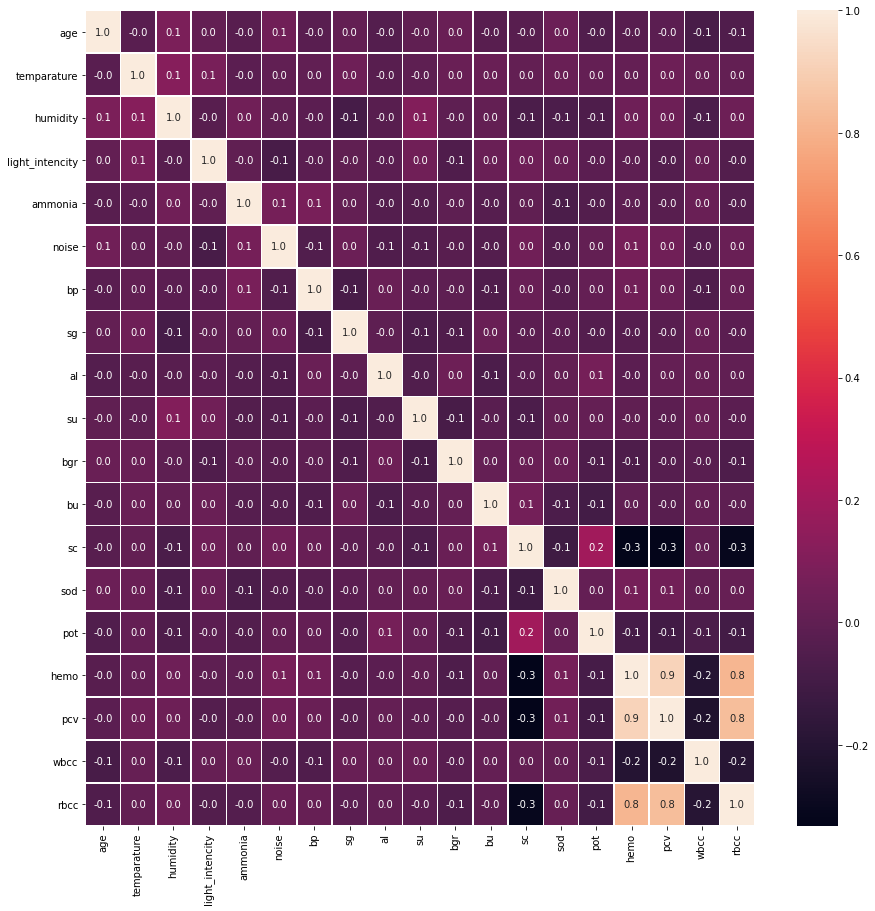

In [ ]:
corr = train.corr()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
from google.colab import files
plt.savefig("pca.png")
files.download("pca.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

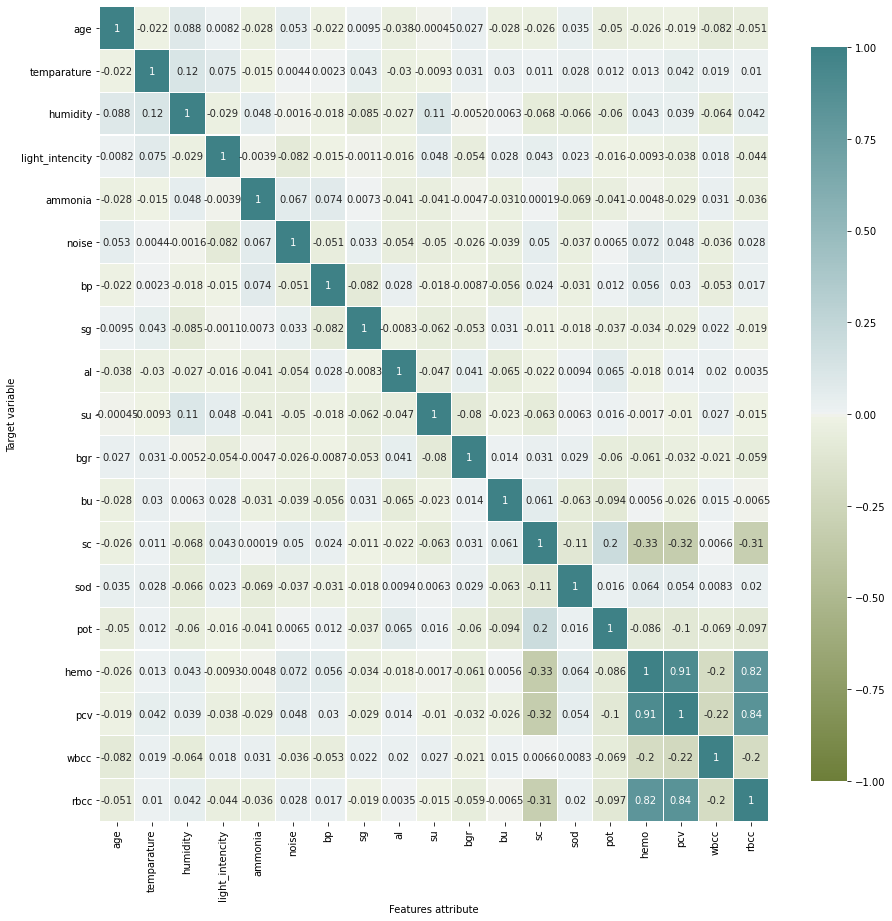

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn
def corrmap(train):
    fig , ax = plt.subplots(figsize =(15,15))
    fig = sbn.heatmap(train.corr(), cmap = sbn.diverging_palette(100, 200, as_cmap = True), cbar_kws={'shrink':.9 }, ax=ax,annot=True, linewidths=0.05, vmin=-1.0, vmax=1.0, linecolor='white')
    plt.xlabel("Features attribute")
    plt.ylabel("Target variable")
corrmap(train)
from google.colab import files
plt.savefig("pca.png")
files.download("pca.png") 

##**Information of Dataset**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              500 non-null    int64  
 1   temparature      500 non-null    float64
 2   humidity         500 non-null    float64
 3   light_intencity  500 non-null    int64  
 4   ammonia          500 non-null    int64  
 5   noise            500 non-null    int64  
 6   bp               500 non-null    int64  
 7   sg               500 non-null    float64
 8   al               500 non-null    int64  
 9   su               500 non-null    int64  
 10  rbc              500 non-null    object 
 11  pc               500 non-null    object 
 12  pcc              500 non-null    object 
 13  ba               500 non-null    object 
 14  bgr              500 non-null    int64  
 15  bu               500 non-null    int64  
 16  sc               500 non-null    float64
 17  sod             

In [ ]:
train['temparature'].value_counts()

41.5    107
39.5    105
40.0    103
41.0     94
40.5     91
Name: temparature, dtype: int64

In [ ]:
train['humidity'].value_counts()

38.0    92
39.0    86
38.5    85
37.5    80
36.5    79
37.0    78
Name: humidity, dtype: int64

In [ ]:
train['light_intencity'].value_counts()

20    56
16    56
11    48
15    46
18    45
17    45
14    42
10    42
13    41
12    41
19    38
Name: light_intencity, dtype: int64

In [ ]:
train['ammonia'].value_counts()

24    93
20    93
21    90
23    78
22    78
25    68
Name: ammonia, dtype: int64

In [ ]:
train['noise'].value_counts()

99     92
96     86
95     85
97     84
100    83
98     70
Name: noise, dtype: int64

In [ ]:
train['ba'].value_counts()

notpresent    478
present        22
Name: ba, dtype: int64

In [ ]:
train['rbc'] = train['rbc'].map({'normal': 0, 'abnormal': 1} ).astype(int)
train['pcc'] = train['pcc'].map({'notpresent': 0, 'present': 1} ).astype(int)

In [ ]:
train['pc'] = train['pc'].map({'normal': 0, 'abnormal': 1} ).astype(int)
train['ba'] = train['ba'].map({'notpresent': 0, 'present': 1} ).astype(int)

In [ ]:
train['htn'].value_counts()

no     353
yes    147
Name: htn, dtype: int64

In [ ]:
train['dm'].value_counts()


no     363
yes    137
Name: dm, dtype: int64

In [ ]:
train['cad'].value_counts()


no     466
yes     34
Name: cad, dtype: int64

In [ ]:
train['appet'].value_counts()


good    418
poor     82
Name: appet, dtype: int64

In [ ]:
train['pe'].value_counts()


no     424
yes     76
Name: pe, dtype: int64

In [ ]:
train['ane'].value_counts()

no     440
yes     60
Name: ane, dtype: int64

In [ ]:
train['rbcc'].value_counts()

4.707435    116
6.500000    104
5.200000     18
4.700000     18
4.500000     17
4.900000     14
3.900000     10
4.800000     10
4.600000      9
3.400000      9
5.500000      9
5.900000      8
6.100000      8
3.700000      8
5.000000      8
5.800000      8
5.600000      7
3.800000      7
5.300000      7
5.400000      7
4.000000      6
4.300000      6
4.200000      6
6.400000      5
5.700000      5
6.200000      5
4.400000      5
4.100000      5
5.100000      5
3.200000      5
6.000000      4
6.300000      4
3.600000      4
4.735000      3
3.000000      3
3.300000      3
3.500000      3
2.500000      2
2.100000      2
3.100000      2
2.800000      2
2.600000      2
2.900000      2
2.700000      2
4.750000      2
4.435000      1
4.705000      1
2.400000      1
8.000000      1
2.300000      1
Name: rbcc, dtype: int64

In [ ]:
train['ane'].value_counts()

no     440
yes     60
Name: ane, dtype: int64

In [ ]:
train['class'].value_counts()

cpd       250
notcpd    250
Name: class, dtype: int64

In [ ]:
train['ane'] = train['ane'].map({'no': 0, 'yes': 1} ).astype(int)
train['pe'] = train['pe'].map({'no': 0, 'yes': 1} ).astype(int)
train['cad'] = train['cad'].map({'no': 0, 'yes': 1} ).astype(int)
train['dm'] = train['dm'].map({'no': 0, 'yes': 1} ).astype(int)
train['htn'] = train['htn'].map({'no': 0, 'yes': 1} ).astype(int)
train['appet'] = train['appet'].map({'poor': 0, 'good': 1} ).astype(int)

In [ ]:
train.head()

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,43,41.5,39.0,20,24,96,176,1.02,1,4,0,0,0,0,134,141,5.0,111.00,2.500000,15.4,44.0,7800.0,5.20,1,1,0,1,0,0,cpd
1,48,41.5,36.5,10,22,96,140,1.02,1,2,0,0,0,0,453,177,4.0,111.00,2.500000,11.3,38.0,6000.0,4.75,0,0,0,1,0,0,cpd
2,46,40.0,38.5,19,24,96,147,1.01,3,3,0,0,0,0,459,127,1.8,111.00,2.500000,9.6,31.0,7500.0,4.75,0,1,0,0,0,1,cpd
3,35,39.5,37.0,12,23,97,168,1.05,3,4,0,1,1,0,297,96,3.8,111.00,2.500000,11.2,32.0,6700.0,3.90,1,0,0,0,1,1,cpd
4,40,41.5,37.5,12,22,97,137,1.01,4,2,0,0,0,0,144,32,1.4,137.54,4.627244,11.6,35.0,7300.0,4.60,0,0,0,1,0,0,cpd


In [ ]:
feature = ['age','bp','sg','al','su','rbc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane']

# separating features
x = train.loc[:,feature]

# separating target
y = train.loc[:,'class']

#Standardising features
x = StandardScaler().fit_transform(x)

In [ ]:
  from sklearn.decomposition import PCA

  pca = PCA(n_components=23)

  pct = pca.fit_transform(x)

  principal_train = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23'])

  pca_train = pd.concat([principal_train,train[['class']]],axis=1)

In [ ]:
pca_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,class
0,0.166230,-0.184961,0.263303,0.944883,-1.224681,-0.861729,-1.632186,-1.568599,0.251385,0.147769,-0.367876,1.000448,-0.179386,-0.296159,0.957605,-0.185605,0.476277,1.680242,0.338881,0.691936,-0.271774,-0.244779,-0.260458,cpd
1,-0.341300,-0.096454,-2.271776,-0.820785,-0.539985,-1.449927,0.275393,0.416893,-0.218840,-0.898462,-0.742667,0.013462,-0.029330,-0.119152,0.638686,0.141482,0.771178,-0.421434,-0.669862,-0.888097,-0.072525,0.414463,0.205753,cpd
2,2.250526,0.379742,-2.122234,-0.419711,1.311569,-0.670255,-0.972292,-0.123403,-1.225255,-1.518718,-0.060894,-0.140440,-0.729585,-0.127418,-0.889854,0.177128,0.814516,-0.483232,-0.353591,1.715633,1.682350,0.475294,-0.144544,cpd
3,3.727147,-0.762107,0.040338,0.524225,0.068074,0.997495,-1.196207,-0.597647,-2.211310,-0.401434,-0.390013,0.067402,-3.478039,0.984774,-2.140269,0.549283,-1.796565,0.479156,0.115864,-1.185991,-0.627536,-0.460837,-0.224288,cpd
4,-0.331508,0.376366,0.955179,0.592096,0.848444,0.785524,0.605541,0.592253,-0.056663,-0.590618,0.141023,-1.236142,-0.157826,-1.720456,-0.116951,0.297635,0.520574,-0.025091,-1.055724,-0.545515,0.260449,0.246257,-0.122719,cpd


##Ploting Principal Components 2PCA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

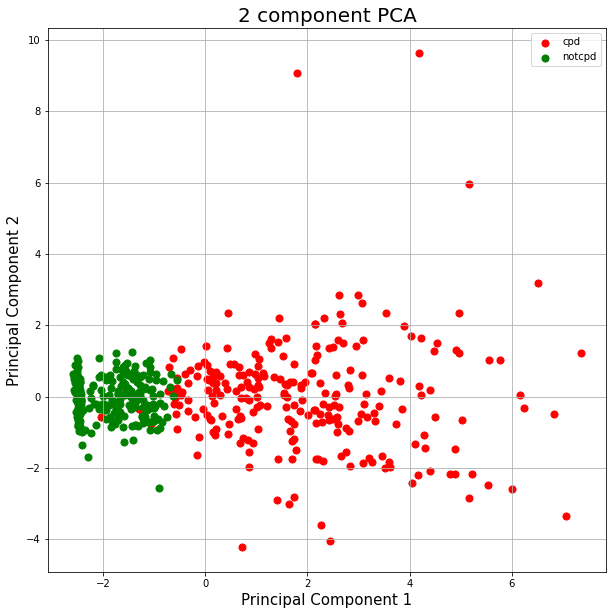

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classes = ['cpd', 'notcpd']
colors = ['r', 'g']
for poultry, color in zip(classes,colors):
    indicesToKeep = pca_train['class'] == poultry
    ax.scatter(pca_train.loc[indicesToKeep, 'pc1']
               , pca_train.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()
from google.colab import files
plt.savefig("pca.png")
files.download("pca.png") 


In [ ]:
pca.explained_variance_ratio_

array([0.22880002, 0.05927127, 0.05298818, 0.05111424, 0.05072223,
       0.04767665, 0.04643068, 0.04406839, 0.04265685, 0.0414024 ,
       0.04070645, 0.038277  , 0.03741864, 0.03432795, 0.03090814,
       0.03015623, 0.02801582, 0.02530132, 0.02318972, 0.02170505,
       0.01346216, 0.00783762, 0.003563  ])

In [ ]:
X = train.drop('class',axis=1)
Y = train['class']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
train['class'] = train['class'].map({'cpd': 1, 'notcpd': 0} ).astype(int)
train.head()

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,43,41.5,39.0,20,24,96,176,1.02,1,4,0,0,0,0,134,141,5.0,111.00,2.500000,15.4,44.0,7800.0,5.20,1,1,0,1,0,0,1
1,48,41.5,36.5,10,22,96,140,1.02,1,2,0,0,0,0,453,177,4.0,111.00,2.500000,11.3,38.0,6000.0,4.75,0,0,0,1,0,0,1
2,46,40.0,38.5,19,24,96,147,1.01,3,3,0,0,0,0,459,127,1.8,111.00,2.500000,9.6,31.0,7500.0,4.75,0,1,0,0,0,1,1
3,35,39.5,37.0,12,23,97,168,1.05,3,4,0,1,1,0,297,96,3.8,111.00,2.500000,11.2,32.0,6700.0,3.90,1,0,0,0,1,1,1
4,40,41.5,37.5,12,22,97,137,1.01,4,2,0,0,0,0,144,32,1.4,137.54,4.627244,11.6,35.0,7300.0,4.60,0,0,0,1,0,0,1


In [ ]:
X = train.drop('class',axis=1)
Y = train['class']

In [ ]:
X.head()

,age,temparature,humidity,light_intencity,ammonia,noise,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,43,41.5,39.0,20,24,96,176,1.02,1,4,0,0,0,0,134,141,5.0,111.00,2.500000,15.4,44.0,7800.0,5.20,1,1,0,1,0,0
1,48,41.5,36.5,10,22,96,140,1.02,1,2,0,0,0,0,453,177,4.0,111.00,2.500000,11.3,38.0,6000.0,4.75,0,0,0,1,0,0
2,46,40.0,38.5,19,24,96,147,1.01,3,3,0,0,0,0,459,127,1.8,111.00,2.500000,9.6,31.0,7500.0,4.75,0,1,0,0,0,1
3,35,39.5,37.0,12,23,97,168,1.05,3,4,0,1,1,0,297,96,3.8,111.00,2.500000,11.2,32.0,6700.0,3.90,1,0,0,0,1,1
4,40,41.5,37.5,12,22,97,137,1.01,4,2,0,0,0,0,144,32,1.4,137.54,4.627244,11.6,35.0,7300.0,4.60,0,0,0,1,0,0


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

##Train Dataset **80%**
##Test Dataset **20%**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 13 to 37
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              350 non-null    int64  
 1   temparature      350 non-null    float64
 2   humidity         350 non-null    float64
 3   light_intencity  350 non-null    int64  
 4   ammonia          350 non-null    int64  
 5   noise            350 non-null    int64  
 6   bp               350 non-null    int64  
 7   sg               350 non-null    float64
 8   al               350 non-null    int64  
 9   su               350 non-null    int64  
 10  rbc              350 non-null    int64  
 11  pc               350 non-null    int64  
 12  pcc              350 non-null    int64  
 13  ba               350 non-null    int64  
 14  bgr              350 non-null    int64  
 15  bu               350 non-null    int64  
 16  sc               350 non-null    float64
 17  sod             

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 304 to 23
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              150 non-null    int64  
 1   temparature      150 non-null    float64
 2   humidity         150 non-null    float64
 3   light_intencity  150 non-null    int64  
 4   ammonia          150 non-null    int64  
 5   noise            150 non-null    int64  
 6   bp               150 non-null    int64  
 7   sg               150 non-null    float64
 8   al               150 non-null    int64  
 9   su               150 non-null    int64  
 10  rbc              150 non-null    int64  
 11  pc               150 non-null    int64  
 12  pcc              150 non-null    int64  
 13  ba               150 non-null    int64  
 14  bgr              150 non-null    int64  
 15  bu               150 non-null    int64  
 16  sc               150 non-null    float64
 17  sod            

##Evaluating Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(rfc, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.98 0.98 1.   0.98 1.   1.   0.98 0.98 0.92 0.98]


98.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=rfc.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.66666666666667


Accuracy for test:  0.9666666666666667
Confussion matrix - Test:  
 [[82  1]
 [ 4 63]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.98      0.94      0.96        67

    accuracy                           0.97       150
   macro avg       0.97      0.96      0.97       150
weighted avg       0.97      0.97      0.97       150

Test AUC value:  0.9965833483186477
Test AUC value:  0.9965833483186477


Text(0.5, 1.0, 'ROC Curve of Test data with thresholds')

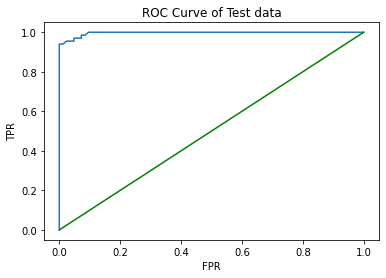

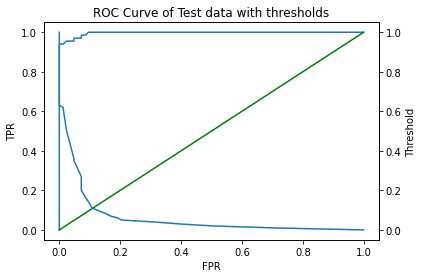

In [ ]:
Y_prob_train = rfc.predict_proba(X_train)[:,1]
Y_pred_train = rfc.predict(X_train)
Y_prob = rfc.predict_proba(X_test)[:,1]
Y_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
# plt.show()
# plt.savefig("rf.png")
# files.download("rf.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with thresholds')
# plt.show()
# plt.savefig("rft.png")
# files.download("rft.png") 

##Evaluating Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dtc, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.96 0.94 1.   1.   0.96 0.98 0.94 0.98 0.94 0.98]


96.8

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=dtc.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.0


Accuracy for test:  0.96
Confussion matrix - Test:  
 [[81  2]
 [ 4 63]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.97      0.94      0.95        67

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test AUC value:  0.958101060960259
Test AUC value:  0.958101060960259


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

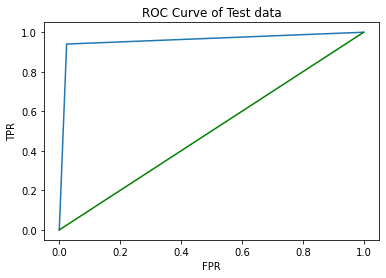

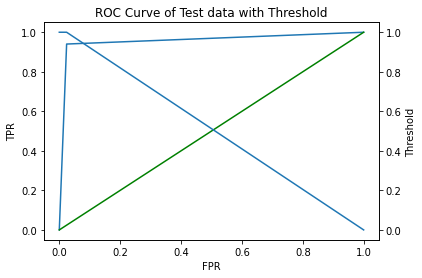

In [ ]:
Y_prob_train = dtc.predict_proba(X_train)[:,1]
Y_pred_train = dtc.predict(X_train)
Y_prob = dtc.predict_proba(X_test)[:,1]
Y_pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
# plt.show()
#plt.savefig("dt.png")
#files.download("dt.png") 
thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 
fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
# plt.show()
#plt.savefig("dtt.png")
#files.download("dtt.png") 

##Evaluating Bagging Classifier 

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
scoring = 'accuracy'
score = cross_val_score(bgc, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.98 0.94 0.98 0.96 0.98 0.98 1.   0.96 0.92 1.  ]


97.0

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
bgc.fit(X_train, Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=bgc.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.0


Accuracy for test:  0.96
Confussion matrix - Test:  
 [[83  0]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        83
           1       1.00      0.91      0.95        67

    accuracy                           0.96       150
   macro avg       0.97      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test AUC value:  0.9831864772522928
Test AUC value:  0.9831864772522928


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

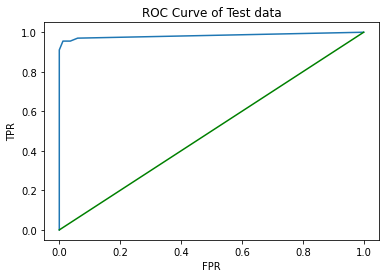

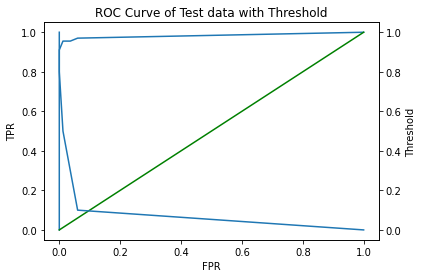

In [ ]:
Y_prob_train = bgc.predict_proba(X_train)[:,1]
Y_pred_train = bgc.predict(X_train)
Y_prob = bgc.predict_proba(X_test)[:,1]
Y_pred = bgc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("bc.png")
#files.download("bc.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("bct.png")
#files.download("bct.png") 

##Evaluating AdaBoost Classifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adc=AdaBoostClassifier()
scoring = 'accuracy'
score = cross_val_score(adc, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[1.   0.98 1.   0.98 1.   1.   1.   0.98 0.94 0.98]


98.6

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

abc.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=dtc.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.0


Accuracy for test:  0.96
Confussion matrix - Test:  
 [[82  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.98      0.93      0.95        67

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test AUC value:  0.9964035245459449
Test AUC value:  0.9964035245459449


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

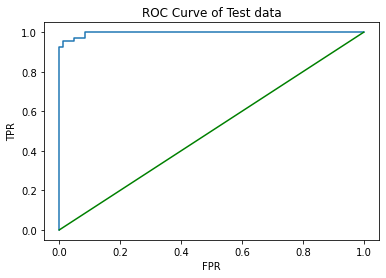

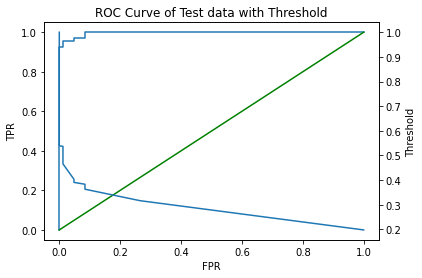

In [ ]:
Y_prob_train = abc.predict_proba(X_train)[:,1]
Y_pred_train = abc.predict(X_train)
Y_prob = abc.predict_proba(X_test)[:,1]
Y_pred = abc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("ad.png")
#files.download("ad.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("adat.png")
#files.download("adat.png") 

##Evaluating SGDC Classifier 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
sgd=SGDClassifier()
scoring = 'accuracy'
score = cross_val_score(sgd, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.5  0.5  0.76 0.44 0.5  0.6  0.4  0.54 0.52 0.68]


54.4

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
# sdg = SGDClassifier(loss = 'hinge')
# sdg.fit(X_train, Y_train)
s = SGDClassifier(loss='hinge')
s2 =s.fit(X_train, Y_train)
calibrator = CalibratedClassifierCV(s2, cv='prefit')
sgd=calibrator.fit(X_train, Y_train)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=sgd.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

44.666666666666664


Accuracy for test:  0.44666666666666666
Confussion matrix - Test:  
 [[ 0 83]
 [ 0 67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.45      1.00      0.62        67

    accuracy                           0.45       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.20      0.45      0.28       150

Test AUC value:  0.5
Test AUC value:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

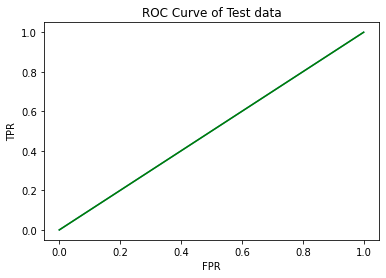

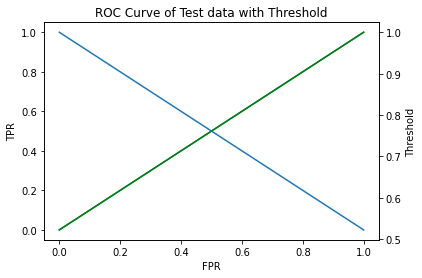

In [ ]:
Y_prob_train = sgd.predict_proba(X_train)[:,1]
Y_pred_train = sgd.predict(X_train)
Y_prob = sgd.predict_proba(X_test)[:,1]
Y_pred = sgd.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("sgd.png")
#files.download("sgd.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for train data

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("sgdt.png")
#files.download("sgdt.png") 

##Evaluating Logistic Regression 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(log_reg, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[0.94 0.92 0.94 0.96 0.92 0.96 0.96 0.94 0.9  0.9 ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



93.4

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=log_reg.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

95.33333333333334


Accuracy for test:  0.9533333333333334
Confussion matrix - Test:  
 [[80  3]
 [ 4 63]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.95      0.94      0.95        67

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Test AUC value:  0.9723071390037763
Test AUC value:  0.9723071390037763


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

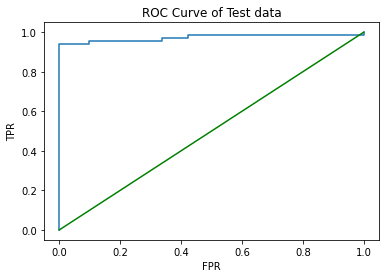

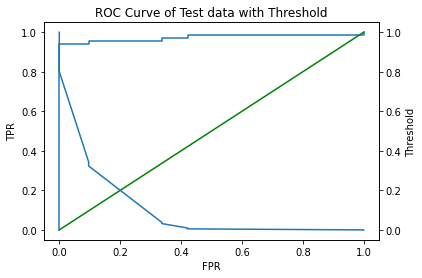

In [ ]:
Y_prob_train = log_reg.predict_proba(X_train)[:,1]
Y_pred_train = log_reg.predict(X_train)
Y_prob = log_reg.predict_proba(X_test)[:,1]
Y_pred = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("lr.png")
#files.download("lr.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for train data

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("lrt.png")
#files.download("lrt.png") 

##Evaluating Navie Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB()
scoring = 'accuracy'
score = cross_val_score(nb, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.96 0.96 0.92 0.98 0.98 0.94 0.94 0.96 0.92 0.88]


94.4

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=nb.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

93.33333333333333


Accuracy for test:  0.9333333333333333
Confussion matrix - Test:  
 [[83  0]
 [10 57]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        83
           1       1.00      0.85      0.92        67

    accuracy                           0.93       150
   macro avg       0.95      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

Test AUC value:  0.9381406221902535
Test AUC value:  0.9381406221902535


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

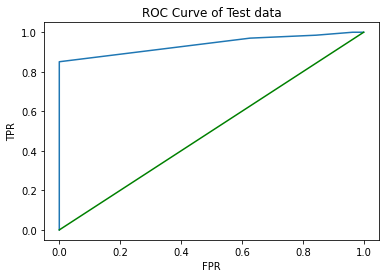

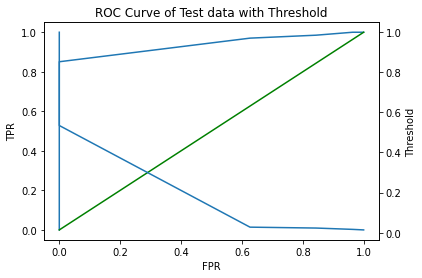

In [ ]:
Y_prob_train = nb.predict_proba(X_train)[:,1]
Y_pred_train = nb.predict(X_train)
Y_prob = nb.predict_proba(X_test)[:,1]
Y_pred = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("nb.png")
#files.download("nb.png") 
thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for train data

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("nbt.png")
#files.download("nbt.png") 

##Evaluating MLPC Classifier 

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier()
scoring = 'accuracy'
score = cross_val_score(mlp, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.5  0.78 0.34 0.88 0.9  0.86 0.64 0.68 0.62 0.88]


70.8

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=mlp.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

85.33333333333334


Accuracy for test:  0.8533333333333334
Confussion matrix - Test:  
 [[64 19]
 [ 3 64]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        83
           1       0.77      0.96      0.85        67

    accuracy                           0.85       150
   macro avg       0.86      0.86      0.85       150
weighted avg       0.87      0.85      0.85       150

Test AUC value:  0.9670922495953965
Test AUC value:  0.9670922495953965


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

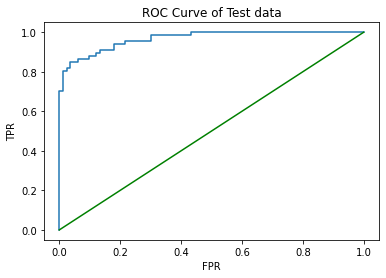

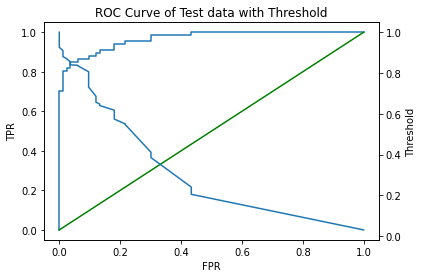

In [ ]:
Y_prob_train = mlp.predict_proba(X_train)[:,1]
Y_pred_train = mlp.predict(X_train)
Y_prob = mlp.predict_proba(X_test)[:,1]
Y_pred = mlp.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("mlp.png")
#files.download("mlp.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("mlpt.png")
#files.download("mlpt.png") 

##Evaluating K Nearest Neighbors Classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(knn, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.76 0.72 0.78 0.72 0.74 0.58 0.66 0.7  0.72 0.78]


71.6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

74.0


Accuracy for test:  0.74
Confussion matrix - Test:  
 [[69 14]
 [25 42]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        83
           1       0.75      0.63      0.68        67

    accuracy                           0.74       150
   macro avg       0.74      0.73      0.73       150
weighted avg       0.74      0.74      0.74       150

Test AUC value:  0.816399928070491
Test AUC value:  0.816399928070491


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

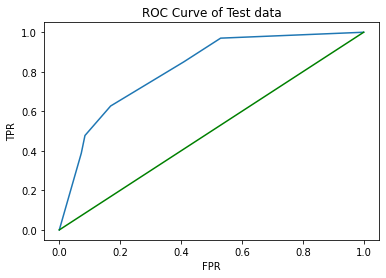

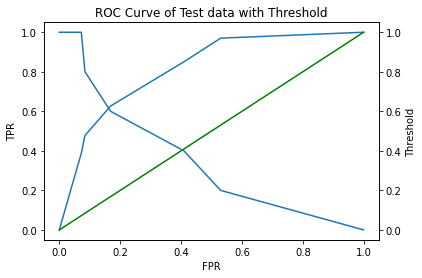

In [ ]:
Y_prob_train = knn.predict_proba(X_train)[:,1]
Y_pred_train = knn.predict(X_train)
Y_prob = knn.predict_proba(X_test)[:,1]
Y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("mlp.png")
#files.download("mlp.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("mlpt.png")
#files.download("mlpt.png") 

##Evaluating XGB Classifier 

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(knn, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[1.   0.98 1.   0.98 1.   0.96 0.98 0.96 0.94 0.98]


97.8

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=xgb.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.0


Accuracy for test:  0.96
Confussion matrix - Test:  
 [[82  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.98      0.93      0.95        67

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test AUC value:  0.9940658155008092
Test AUC value:  0.9940658155008092


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

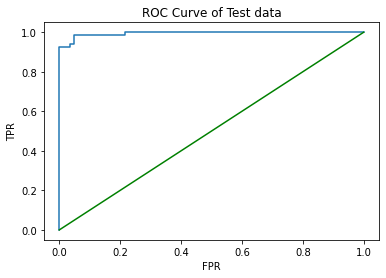

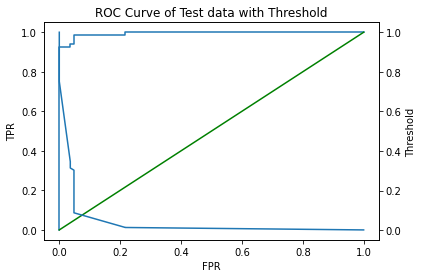

In [ ]:
Y_prob_train = xgb.predict_proba(X_train)[:,1]
Y_pred_train = xgb.predict(X_train)
Y_prob = xgb.predict_proba(X_test)[:,1]
Y_pred = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("mlp.png")
#files.download("mlp.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("mlpt.png")
#files.download("mlpt.png") 

##Evaluating Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(knn, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[1.   0.98 1.   0.98 1.   0.96 0.98 0.96 0.94 0.98]


97.8

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=XGBClassifier()
gbc.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##Expected Accurecy with Confusion matrix & ROC curve

In [ ]:
Y_pred=gbc.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

96.0


Accuracy for test:  0.96
Confussion matrix - Test:  
 [[82  1]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.98      0.93      0.95        67

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test AUC value:  0.9940658155008092
Test AUC value:  0.9940658155008092


Text(0.5, 1.0, 'ROC Curve of Test data with Threshold')

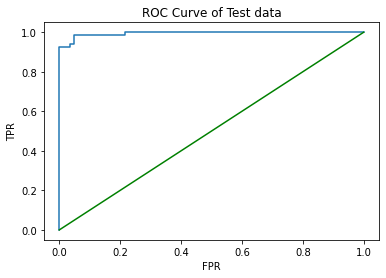

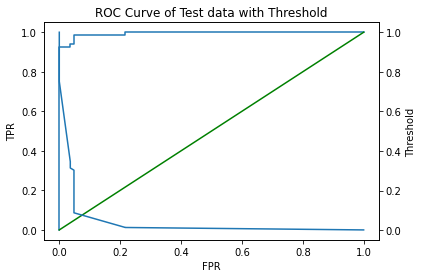

In [ ]:
Y_prob_train = gbc.predict_proba(X_train)[:,1]
Y_pred_train = gbc.predict(X_train)
Y_prob = gbc.predict_proba(X_test)[:,1]
Y_pred = gbc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(Y_test,Y_pred))
print('Confussion matrix - Test: ','\n',confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'g-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Test data')
#plt.savefig("mlp.png")
#files.download("mlp.png") 

thresholds[thresholds>1]=1
print('Test AUC value: ', roc_auc_score(Y_test, Y_prob)) 

fig, ax = plt.subplots()

ax.plot(fpr, tpr) 
ax.plot(fpr, fpr, 'g-') 
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC Curve of Test data with Threshold')
#plt.savefig("mlpt.png")
#files.download("mlpt.png") 